In [9]:
# import nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = "https://www.ktk.kz/ru/newsfeed/"
html = urlopen(url).read()
soup = BeautifulSoup(html)
print(soup)
# удалить все элементы скрипта и стиля
for script in soup(["script", "style"]):
    script.extract()    # извлечение данных
print(soup)

text = soup.get_text()
print(text)
# разбить линии и убрать начальные и конечные пробелы в каждой строке
lines = (line.strip() for line in text.splitlines())
# разбить несколько заголовков в строке каждый
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# пустые строки
text = 'n'.join(chunk for chunk in chunks if chunk)

print(text)
#скачать и распечатать стоп-слова для рус/каз языка
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('russian','kazakh'))
print(stop_words)

#токенизировать набор данных
from nltk.tokenize import sent_tokenize, word_tokenize
words = word_tokenize(text)
print(words)

# удаляет знаки препинания и цифры
wordsFiltered = [word.lower() for word in words if word.isalpha()]
print(wordsFiltered)

# удалить стоп-слова из набора токенизированных данных
filtered_words = [word for word in wordsFiltered if word not in stopwords.words('russian','kazakh')]
print(filtered_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Madik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Madik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<!DOCTYPE html>
<html lang="ru">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>Лента новостей | КТК</title>
<meta content="Лента новостей КТК" name="Description"/>
<meta content="Лента новостей, КТК, newsfeed ktk, жаңалықтар" name="Keywords"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="@@ktk_news" name="twitter:site"/>
<meta content="Лента новостей" name="twitter:title"/>
<meta content="Лента новостей КТК" name="twitter:description"/>
<meta content="https://www.ktk.kz/ru/newsfeed/" name="twitter:url"/>
<meta content="" name="twitter:image"/>
<meta content="KTK" property="og:site_name"/>
<meta content="Лента новостей" property="og:title"/>
<meta content="Лента новостей КТК" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:image"/>
<meta content="600" property="og:image:width"/>
<meta content="358" property="og:image:height"/>
<link href="/fa

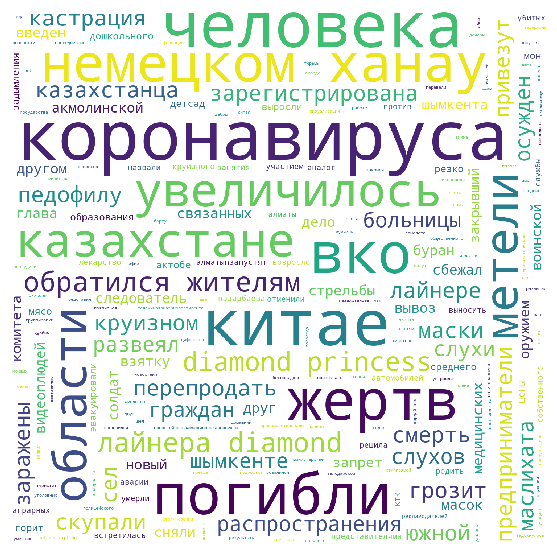

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words=1000, margin=10, background_color='white',
scale=3, relative_scaling = 0.5, width=500, height=500,
random_state=1).generate(' '.join(filtered_words))
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()
#wc.to_file("/wordcloud.png")